# Outliers

In this notebook, we will discuss how to identify outliers and how to deal with them 

In [54]:
# import needed libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [55]:
# load the 'Iris' dataset 
iris_df = pd.read_csv('Iris_Dataset.csv')

# Display the first few rows of the dataset
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## How to identify outliers ?

1. Box Plot

2. Histogram

3. Scatter Plot

4. Interquartile Range (IQR) based method



### #1 Box plot

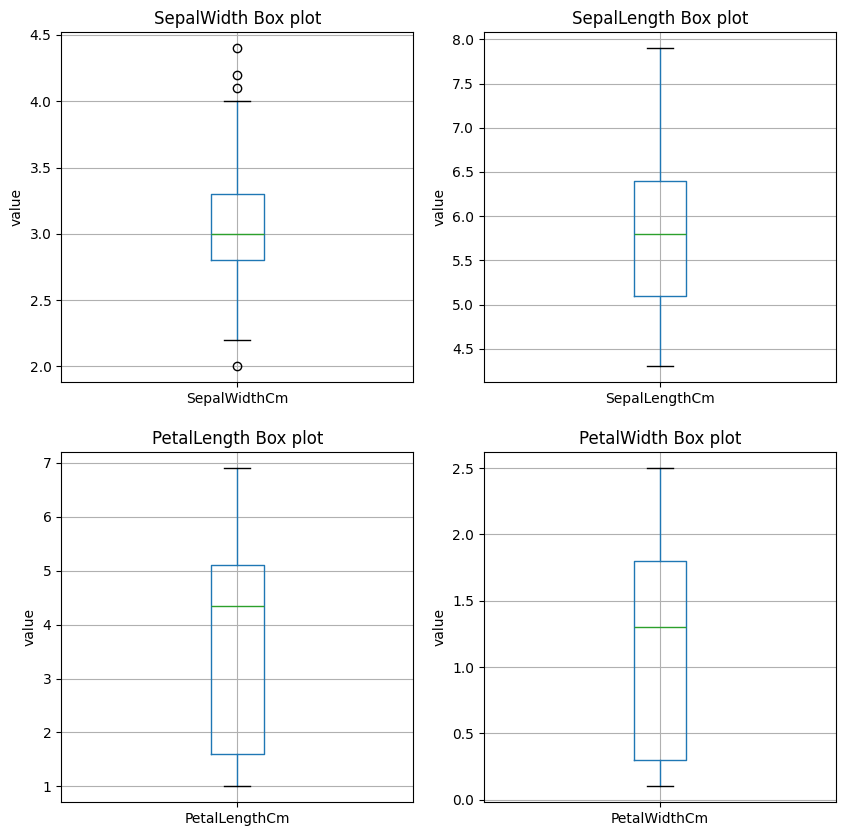

In [56]:
plt.figure(figsize=(10, 10))                          # Defining figure size 

# Plotting SepalWidth column
plt.subplot(2, 2, 1)                                  # first plot coordinates
iris_df.boxplot(['SepalWidthCm'])
plt.ylabel('value')                                   # y- axis label
plt.title('SepalWidth Box plot')                      # title of the boxplot

# Plotting SepalLength column
plt.subplot(2, 2, 2)
iris_df.boxplot(['SepalLengthCm'])
plt.ylabel('value')
plt.title('SepalLength Box plot')

# Plotting PetalLength column
plt.subplot(2, 2, 3)
iris_df.boxplot(['PetalLengthCm'])
plt.ylabel('value')
plt.title('PetalLength Box plot')

# Plotting PetalWidth column
plt.subplot(2, 2, 4)
iris_df.boxplot(['PetalWidthCm'])
plt.ylabel('value')
plt.title('PetalWidth Box plot')

plt.show()

By examining the boxplot figures, it is evident that only the SepalWidth column contains outliers.

### #2 Histogram

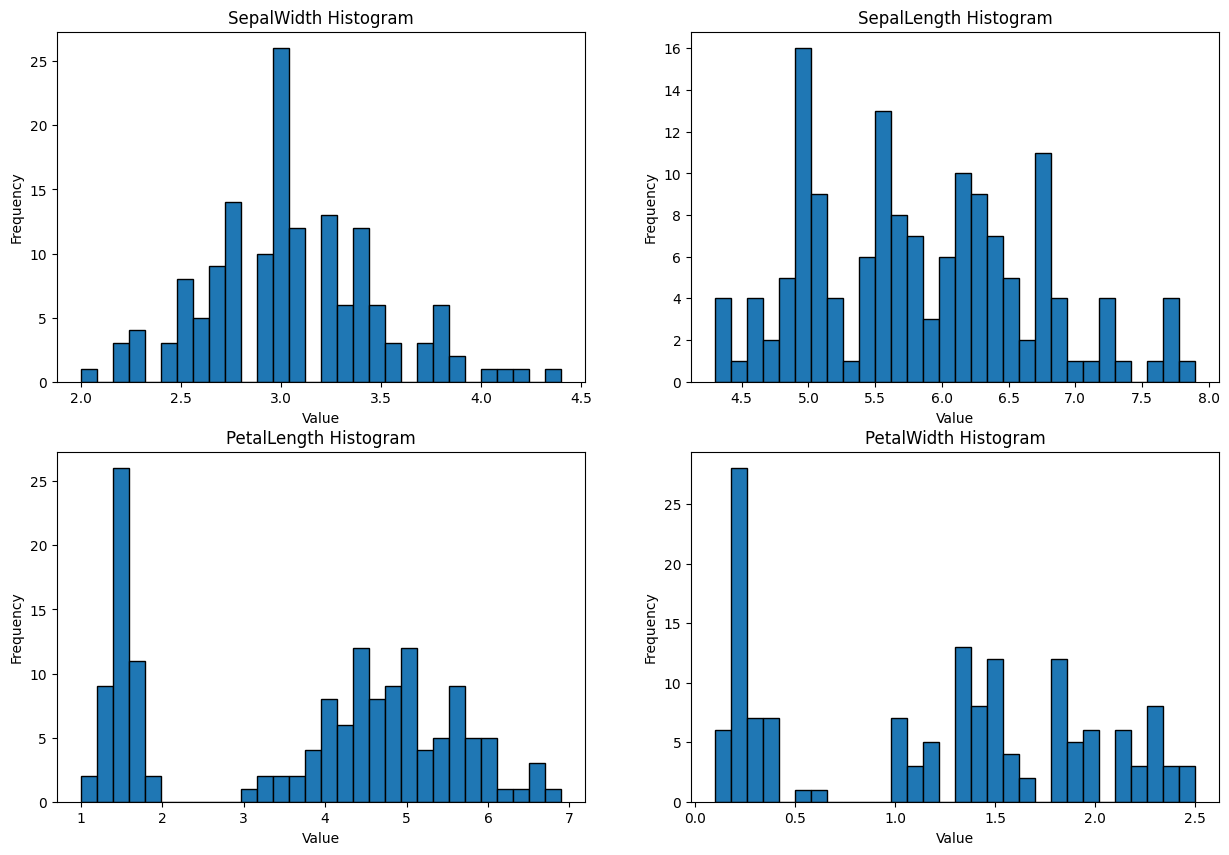

In [57]:
plt.figure(figsize=(15, 10))                                                    # Defining figure size 

plt.subplot(2, 2, 1)                                                            # first plot coordinates
plt.hist(iris_df['SepalWidthCm'], bins =30, edgecolor = 'black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('SepalWidth Histogram')


plt.subplot(2, 2, 2)
plt.hist(iris_df['SepalLengthCm'], bins =30, edgecolor = 'black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('SepalLength Histogram')

plt.subplot(2, 2, 3)
plt.hist(iris_df['PetalLengthCm'], bins =30, edgecolor = 'black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('PetalLength Histogram')

plt.subplot(2, 2, 4)
plt.hist(iris_df['PetalWidthCm'], bins =30, edgecolor = 'black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('PetalWidth Histogram')

plt.show()

### #3 Scatter plot

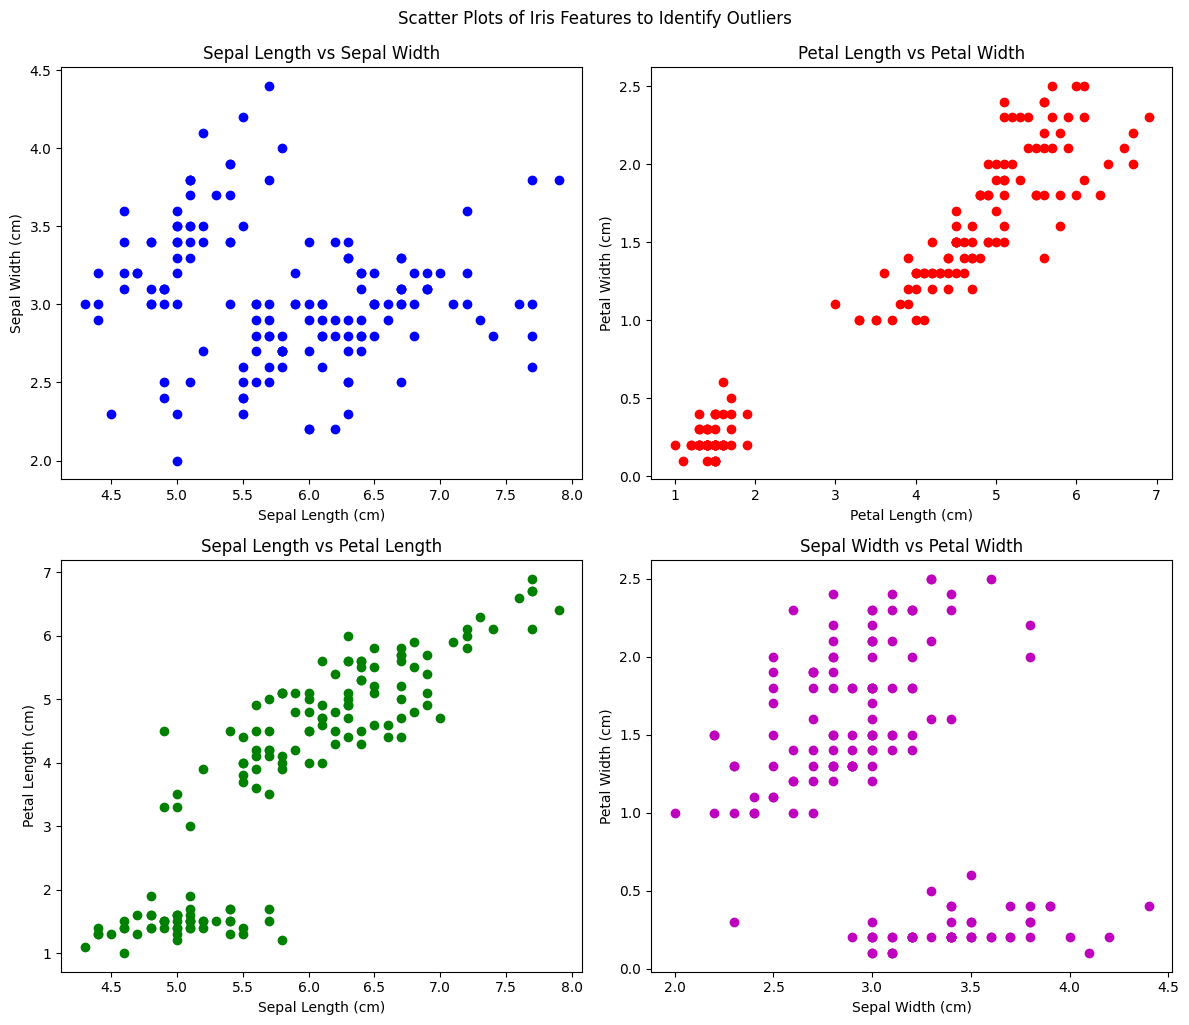

In [58]:

plt.figure(figsize=(12, 10))

# Scatter plot: Sepal length vs Sepal width
plt.subplot(2, 2, 1)
plt.scatter(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], color='b')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

# Scatter plot: Petal length vs Petal width
plt.subplot(2, 2, 2)
plt.scatter(iris_df['PetalLengthCm'], iris_df['PetalWidthCm'], color='r')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Scatter plot: Sepal length vs Petal length
plt.subplot(2, 2, 3)
plt.scatter(iris_df['SepalLengthCm'], iris_df['PetalLengthCm'], color='g')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')

# Scatter plot: Sepal width vs Petal width
plt.subplot(2, 2, 4)
plt.scatter(iris_df['SepalWidthCm'], iris_df['PetalWidthCm'], color='m')
plt.title('Sepal Width vs Petal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.suptitle('Scatter Plots of Iris Features to Identify Outliers', y=1.02)

plt.show()


### #4  Interquartile Range (IQR)

In [59]:
# function to calculate sum of outliers in each column using IQR 
def outliers_sum (data):
   Q1 = data.quantile(0.25)  
   Q3 = data.quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = (data < lower_bound) | (data > upper_bound)
   return outliers.sum()

# Applying the outliers_sum method
PetalLength_outl = outliers_sum(iris_df['PetalLengthCm'])
PetalWidth_outl = outliers_sum(iris_df['PetalWidthCm'])
SepalLength_outl = outliers_sum(iris_df['SepalLengthCm'])
SepalWidth_outl = outliers_sum(iris_df['SepalWidthCm'])

# printing outliers
print(PetalLength_outl)
print(PetalWidth_outl)
print(SepalLength_outl)
print(SepalWidth_outl)

0
0
0
4


## Handling outliers:
1. removing outliers 
2. Imputation 
3. Winsorizing
4. Data Transformation

### #1 Removing outliers 

Text(0.5, 1.0, 'SepalWidth Box plot')

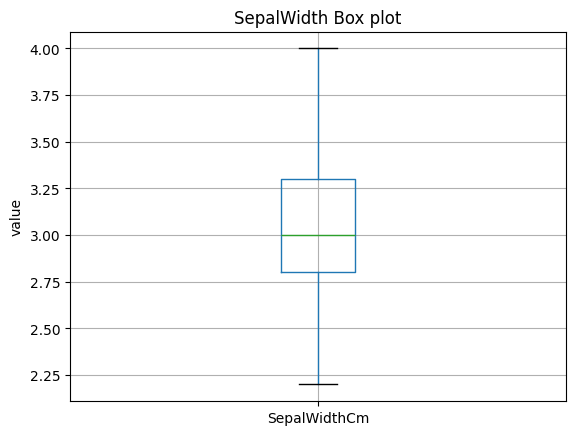

In [60]:
# we will remove outliers on SepalWidthCm as it the only column that has outliers in the dataset
 
# Specify the column you want to analyze for outliers
column = 'SepalWidthCm'

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the specific column
Q1 = iris_df[column].quantile(0.25)
Q3 = iris_df[column].quantile(0.75)

# Calculate IQR (Interquartile Range) for the specific column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers for the specific column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers indices in the specific column
outliers_indices = iris_df[(iris_df[column] < lower_bound) | (iris_df[column] > upper_bound)].index

# Drop the rows with outliers in the specific column
clean_iris_df = iris_df.drop(outliers_indices)

# check if there is still outliers or no
clean_iris_df.boxplot(['SepalWidthCm'])
plt.ylabel('value')                                   
plt.title('SepalWidth Box plot') 


### #2 Imputation

you can use any type of imputation techniques that we have mentioned before:
1. Mean imputation
2. Mode imputation
3. Median imputation
4. KNN imputation

we will work on mean imputation as example

In [61]:

# Calculate the IQR
Q1 = np.percentile(iris_df['SepalWidthCm'], 25)
Q3 = np.percentile(iris_df['SepalWidthCm'], 75)
IQR = Q3 - Q1

# Determine outliers of 'SepalWidthCm'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

2.05
4.05


C:\Users\HANIN\AppData\Local\Temp\ipykernel_10192\2540534867.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  imputed_iris_df['SepalWidthCm'][imputed_iris_df['SepalWidthCm'] < lower_bound] = mean
C:\Users\HANIN\AppData\Local\Temp\ipykern

{'whiskers': [<matplotlib.lines.Line2D at 0x1b406959e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1b40695a420>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b406959c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1b40695a8a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b40695ab40>],
 'means': []}

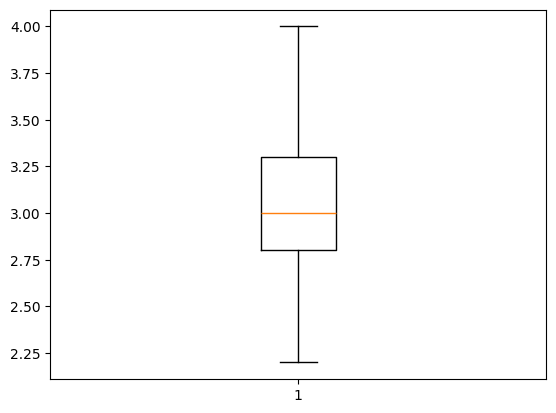

In [62]:
# Handling Age outliers 

# make copy of the main dataframe
imputed_iris_df = iris_df.copy()

# calculate mean
mean = iris_df['SepalWidthCm'].mean()

# substitue outliers with mean values 
imputed_iris_df['SepalWidthCm'][imputed_iris_df['SepalWidthCm'] < lower_bound] = mean 
imputed_iris_df['SepalWidthCm'][imputed_iris_df['SepalWidthCm'] > upper_bound] = mean 

# check if there is still outliers or no
plt.boxplot(imputed_iris_df['SepalWidthCm'])

### #3 Winsorizing

{'whiskers': [<matplotlib.lines.Line2D at 0x1b40636deb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b40636e6c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b40636c2f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b40636ea20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b40636f5c0>],
 'means': []}

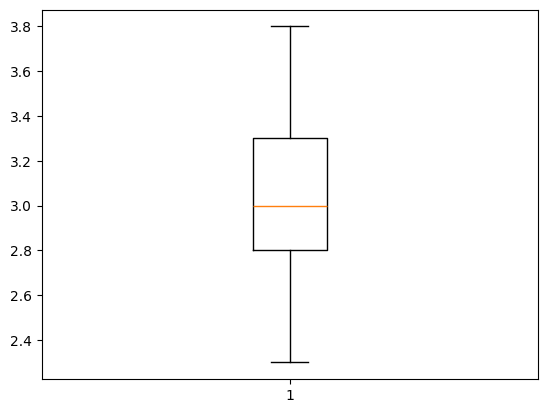

In [52]:
# import winsorize lib
from scipy.stats.mstats import winsorize

# Specify the column you want to Winsorize
column = 'SepalWidthCm'

# The limits parameter is the percentage of data to Winsorize (set to 5% from both ends in this example)
iris_df[column] = winsorize(iris_df[column], limits=[0.05, 0.05])

# check if there is still outliers or no
plt.boxplot(iris_df['SepalWidthCm'])

### #4 Data Transformation

Examples on data transformation techniques:
1. Logarithmic Transformation
2. Square Root Transformation
3. Reciprocal Transformation

we will work on logarithmic transformation as example

{'whiskers': [<matplotlib.lines.Line2D at 0x1b40683b140>,
 'caps': [<matplotlib.lines.Line2D at 0x1b40683b650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b40683af00>],
 'medians': [<matplotlib.lines.Line2D at 0x1b40683bbc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b40683be60>],
 'means': []}

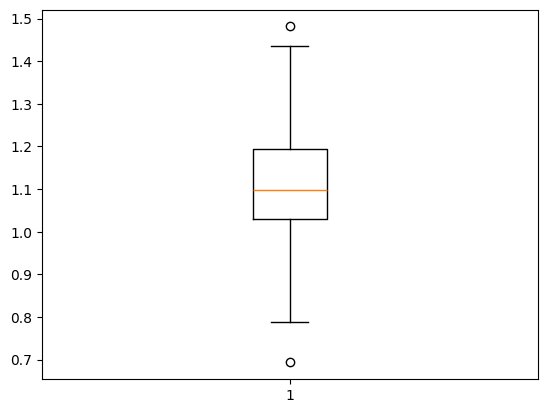

In [65]:
# Specify the column you want to transform
column = 'SepalWidthCm'

# make a copy of the main dataframe
transformed_iris_df = iris_df.copy()

# Apply the logarithmic transformation
transformed_iris_df[column] = np.log(transformed_iris_df[column])  

# check if there is still outliers or no
plt.boxplot(transformed_iris_df['SepalWidthCm'])

seems like logarithmic transformation wasn't the best option for this dataset as there are some of the outliers appearing even after transformation, you can try using other technique ans see the results! :>